# Final Perform

This is the final perform. This notebook is serves as a template for how you should structure your final submission. There are no autograded tests for this Perform. You should also feel free to add more cells and move sections around if you believe it will improve the cohesion of the assignment.

The data is in RateMyProfessorSampleData.zip. You will need to unzip the file to access the data files. The data is a [sample data dump from RateMyProfessor.com](https://data.mendeley.com/datasets/fvtfjyvw7d/2).

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before saving and submitting your .ipynb file (the notebook file) on gradescope. There is no autograder for this Perform. It is entirely manually graded.

In [12]:
# Run this code cell to import relevant libraries
# Feel free to add any other libraries here or later in your notebook
# Please update to seaborn v0.11 for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

print(sns.__version__)

0.11.0


# Introduction

*Add text here if you would like to provide an introduction to your analysis that will add to the notebook's cohesion*

# Data Processing

This section should have all of your data loading and cleaning code where you load and create your DataFrame(s). It does not need to contain all of the data processing code if creating a new column or table in a later section makes more sense for explanation and cohesion.

In [2]:
import os
import glob
path = os.getcwd()
path

'/Users/jenniferyan/Duke/Senior Year/CS216/CS216_Project'

### Data Loading 
    Read files into "ratings" and clean dataset by dropping rows/columns with large percentage of nan values.

In [3]:
import os
import glob
path = r'/Users/jenniferyan/Duke/Senior Year/CS216/CS216_Project/RateMyProfessorSampleData'
#r'/Users/rebeccarow/Desktop/CS216/Performs/Final Perform/RateMyProfessorSampleData' #becca's

#df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "my_files*.csv"))))
#df = pd.concat(map(pd.read_csv, glob.glob(path)))

In [4]:
path = r'/Users/jenniferyan/Duke/Senior Year/CS216/CS216_Project/RateMyProfessorSampleData'                   # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
ratings   = pd.concat(df_from_each_file, ignore_index=True)
ratings

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,Mimi Kline,Bucks County Community College,Medicine department,Newtown,PA,0.0,5.0,NaN,4.0,NaN,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,0,0,"Mimi is awesome. She is tough, but fair. She i..."
1,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,Tough Grader (3) Inspirational (3) Skip clas...,...,4.0,3.0,Mandatory,Yes,Yes,A,RESPECTED,0,0,Jones is the best! He does get off topic here ...
2,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,Tough Grader (3) Inspirational (3) Skip clas...,...,1.0,4.0,Mandatory,Yes,No,C,SKIP CLASS? YOU WON\'T PASS. TOUGH GRADER IN...,0,2,"Horrible professor, but is a good guy at heart..."
3,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,Tough Grader (3) Inspirational (3) Skip clas...,...,3.5,2.0,Mandatory,Yes,NaN,A,SKIP CLASS? YOU WON\'T PASS. GET READY TO REA...,0,0,Pretty sweet old guy. His tests are kinda toug...
4,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,Tough Grader (3) Inspirational (3) Skip clas...,...,2.5,4.0,Mandatory,Yes,NaN,A,TOUGH GRADER,1,0,He has a deep passion for Chemistry but is a b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19680,Debbie Damiani,Berks Technical Institute,Medicine department,Wyomissing,PA,5.0,3.3,NaN,2.0,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,0,0,Not that good of a professor. Her study guides...
19681,Debbie Damiani,Berks Technical Institute,Medicine department,Wyomissing,PA,5.0,3.3,NaN,2.0,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,She was awesome really explained and gave a cl...
19682,Debbie Damiani,Berks Technical Institute,Medicine department,Wyomissing,PA,5.0,3.3,NaN,2.0,NaN,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,0,0,"Ms. D is extremely helpful, just be a respectf..."
19683,Debbie Damiani,Berks Technical Institute,Medicine department,Wyomissing,PA,5.0,3.3,NaN,2.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,The epitome of hypocrisy.


In [5]:
review = ratings[["star_rating", "diff_index"]].values
target = ratings[["would_take_agains"]].dropna()
target

,would_take_agains
1,Yes
2,No
5,Yes
22,Yes
55,Yes
...,...
19551,Yes
19564,Yes
19601,No
19602,Yes


In [6]:
#edit to drop for only 
ratings2 = ratings.dropna(subset=["star_rating", "diff_index", "would_take_agains"]).reset_index()
ratings2

,index,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,...,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,1,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,...,4.0,3.0,Mandatory,Yes,Yes,A,RESPECTED,0,0,Jones is the best! He does get off topic here ...
1,2,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,...,1.0,4.0,Mandatory,Yes,No,C,SKIP CLASS? YOU WON\'T PASS. TOUGH GRADER IN...,0,2,"Horrible professor, but is a good guy at heart..."
2,5,Dennis Jones,California State University Stanislaus,Chemistry department,Turlock,CA,8.0,4.3,NaN,2.4,...,5.0,3.0,Not Mandatory,Yes,Yes,A,PARTICIPATION MATTERS INSPIRATIONAL,0,0,Mr. Jones is an amazing lab techer. If you don...
3,22,Eddie Tapia,Full Sail University,Writing department,Winter Park,FL,6.0,3.1,NaN,1.0,...,3.5,1.0,Mandatory,Yes,Yes,A+,SKIP CLASS? YOU WON\'T PASS. HILARIOUS,0,0,"I adore Eddie. He\'s a great teacher, very hel..."
4,55,Kevin Bittle,Hillsborough Community College (all campuses),Philosophy department,Tampa,FL,2.0,4.8,NaN,1.3,...,5.0,1.0,NaN,Yes,Yes,Not,RESPECTED PARTICIPATION MATTERS,0,1,Professor Bittle is the guy to take on every d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,19551,Raina Rutti,Dalton State College,Management department,Dalton,GA,8.0,4.4,NaN,1.7,...,4.5,2.0,Mandatory,Yes,Yes,A,GROUP PROJECTS HILARIOUS,1,0,Dr. Rutti is an awesome professor. She takes a...
3520,19564,Minor Myers,Brooklyn Law School,Property Law department,Brooklyn,NY,8.0,4.3,NaN,2.8,...,5.0,3.0,NaN,Yes,Yes,NaN,HILARIOUS AMAZING LECTURES PARTICIPATION MAT...,0,0,One of the best professors I\'ve had at BLS. H...
3521,19601,Michael Mahoney,North Arkansas College,Not Specified department,Harrison,AR,7.0,3.9,NaN,3.0,...,2.0,4.0,NaN,Yes,No,B,PARTICIPATION MATTERS,0,0,While Mr. Mahoney is very good at what he does...
3522,19602,Michael Mahoney,North Arkansas College,Not Specified department,Harrison,AR,7.0,3.9,NaN,3.0,...,4.0,3.0,Mandatory,Yes,Yes,NaN,GIVES GOOD FEEDBACK ACCESSIBLE OUTSIDE CLASS ...,0,0,He made speech fun and gave great feed back on...


# Visualization

This section should contain at least one visualization showing something informative about the data. The skills you learned for this section primarily come from Module 5B.

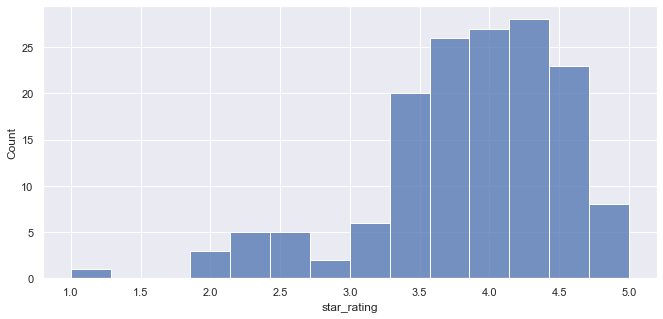

In [13]:
# number of departments recieving an average star rating of ...
ratings3 = ratings2.copy()
ratings3['department_name'] = ratings3['department_name'].str.replace(' department','')
dept = ratings3.groupby("department_name").mean()
sns.histplot(x = "star_rating", data = dept)
#plt.title("Department")

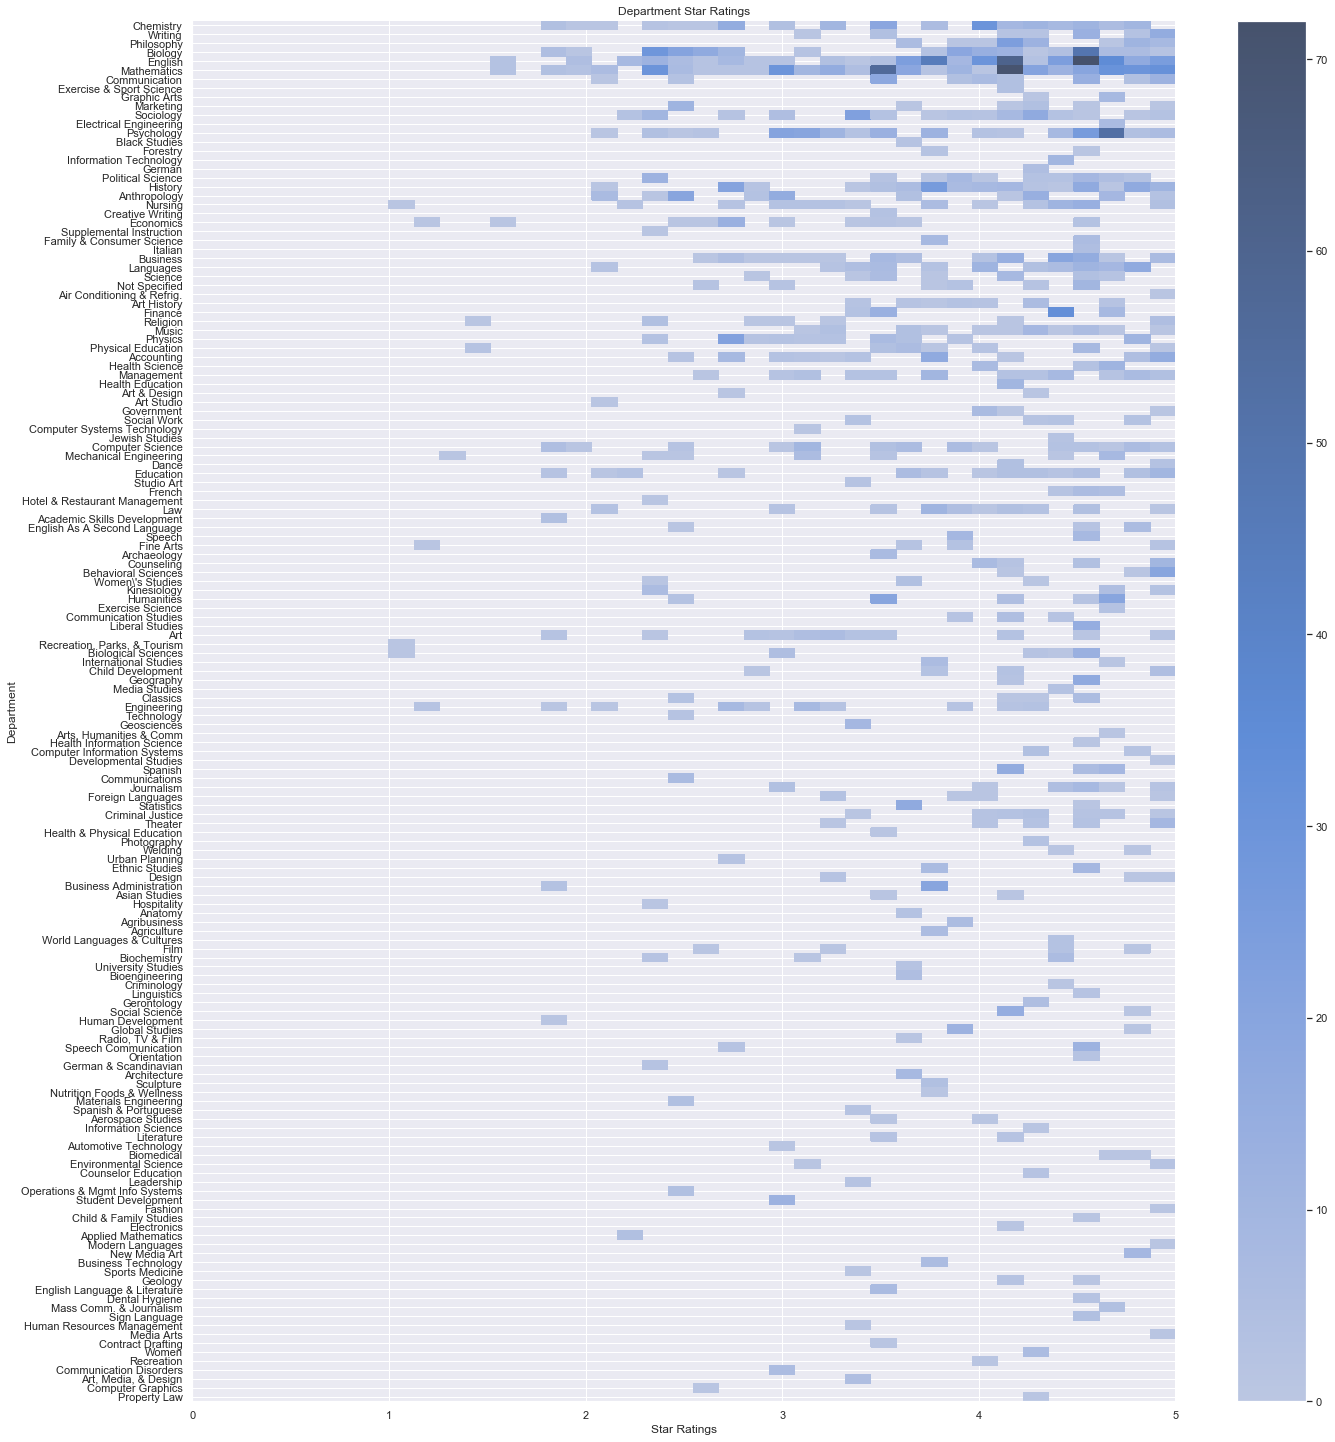

In [14]:
sns.set(rc={'figure.figsize':(11,5)})
sns.displot(data=ratings3, x="star_rating", y="department_name", cbar=True, height = 20)
plt.xticks([0,1,2,3,4,5])
plt.title("Department Star Ratings")
plt.xlabel("Star Ratings")
plt.ylabel("Department")
plt.show()

Text(0.5, 1, 'Average Department Star Rating')

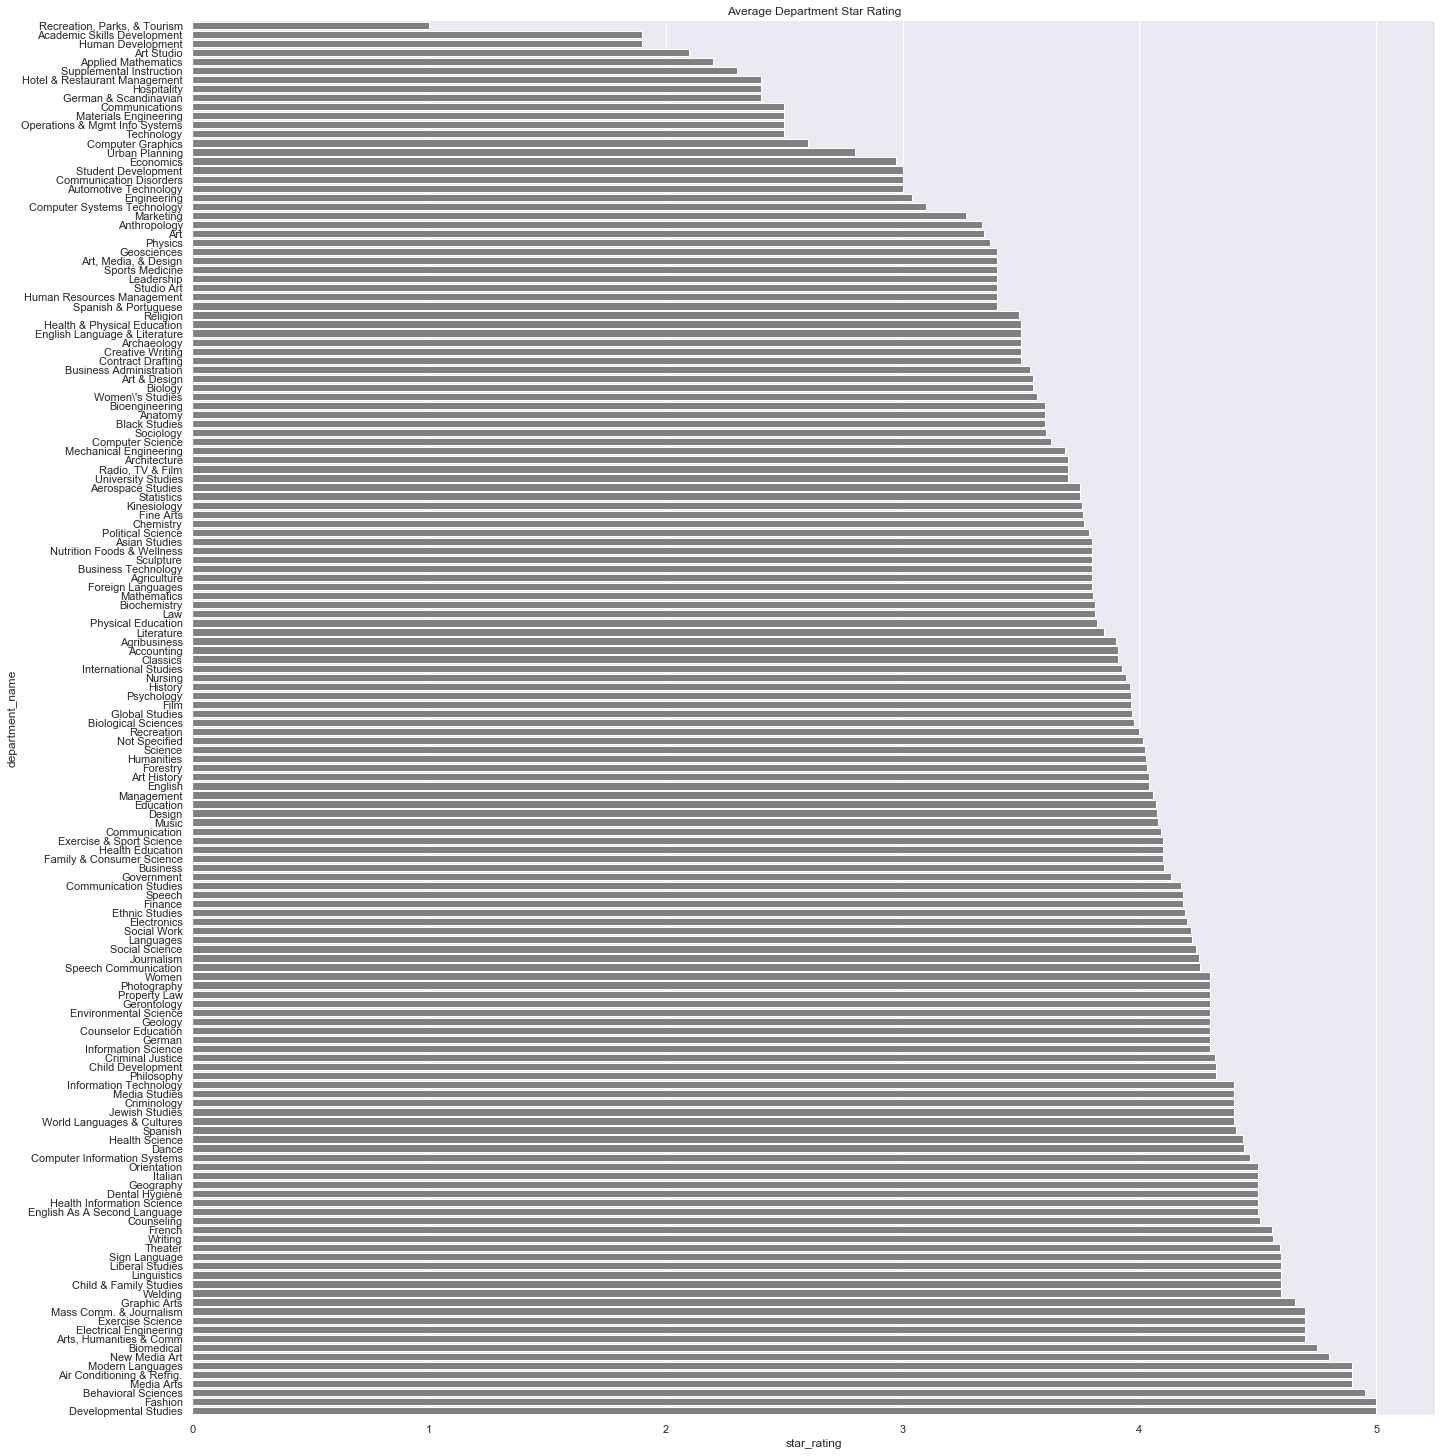

In [15]:
star = ratings3.groupby("department_name").mean().reset_index()
star = star.sort_values("star_rating")
sns.catplot(x = "star_rating", y = "department_name", kind = "bar", data = star, height = 20, color = "gray")
plt.title("Average Department Star Rating")

# Hypothesis Test

This section should contain at least one hypothesis test about the data. The skills you learned for this section primarily came from Module 3B.

In [16]:
from scipy import stats

math_ratings = ratings[ratings['department_name'] == 'Mathematics department']['star_rating']
writing_ratings = ratings[ratings['department_name'] == 'Writing department']['star_rating']
res = stats.ttest_ind(math_ratings, writing_ratings)
print("Test result for math vs. writing depts: " + str(res))

science_ratings = ratings[ratings['department_name'] == 'Science department']['star_rating']
english_ratings = ratings[ratings['department_name'] == 'English department']['star_rating']
res2 = stats.ttest_ind(science_ratings, english_ratings)
print("Test result for science vs. english depts: " + str(res2))

Test result for math vs. writing depts: Ttest_indResult(statistic=-5.738160506418712, pvalue=1.116082604608682e-08)
Test result for science vs. english depts: Ttest_indResult(statistic=-2.6592107366305875, pvalue=0.007885764377523264)


Both p-values suggest that we are able to reject the null hypothesis that stem and humanities departments have no difference in star ratings. In both instances, the average stem star ratings are significantly lower than the average humanities star ratings

# Prediction

This section should contain the creation and testing of at least one model. The skills you learned for this section primarily came from Module 6.

0.7999432463110102


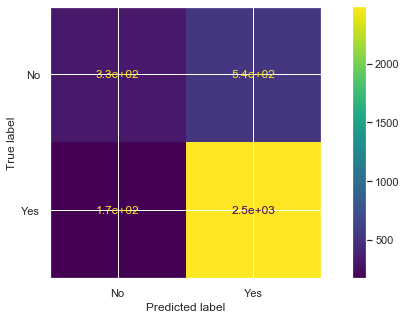

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
pd.options.mode.chained_assignment = None  # default='warn'

# Write your code for question 1 here
# and store your results in the correct variable names for full credit

data = ratings2[['diff_index', 'star_rating']].values
target = ratings2['would_take_agains'].values
logistic_model = LogisticRegression()
logistic_model.fit(X=data, y=target)
ratings2['predicted_take_again'] = logistic_model.predict(data)
print(logistic_model.score(data, target))
plot_confusion_matrix(logistic_model, data, target)

# Additional Analysis

This section should contain one more analysis of your choosing. It can be like any of the other analysis sections.

In [18]:
from sklearn.model_selection import train_test_split

dep = ['Science department','English department', 'Mathematics department', 'Writing department']
comp = ratings2[ratings2['department_name'].isin(dep)]
data = comp.drop(columns=["department_name"])
target = comp["department_name"]
train_data, test_data, train_target, test_target = train_test_split( data, target, test_size=0.7, random_state=216)

accuracy: 0.5264


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

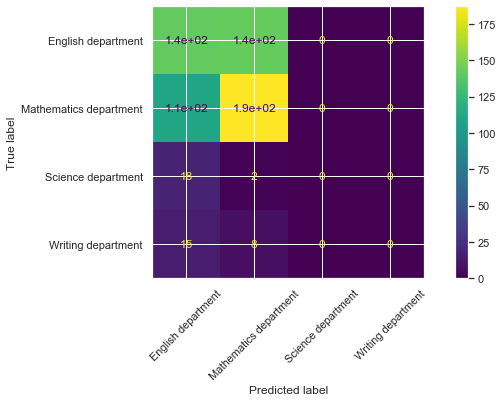

In [19]:
#predict star ratings for department (or specific math, english, science, writing)
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#cat = train_data[["star_rating"]].values
#data_train = np.append(OneHotEncoder().fit_transform(cat).toarray(), train_data[["diff_index"]], axis = 1)
data_train = train_data[['diff_index', 'star_rating']].values
#cat2 = test_data[["department_name", "would_take_agains", "attence", "for_credits"]].values has nan in attendence and credit
#cat2 = test_data[["star_rating"]].values
#data_test = np.append(OneHotEncoder().fit_transform(cat2).toarray(), test_data[["diff_index"]], axis = 1)
data_test = test_data[['diff_index', 'star_rating']].values
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X=data_train, y =train_target)

test_data["predict"] = logistic_model.predict(data_test)

score = logistic_model.score(data_test,test_target)
print("accuracy:", score)

matrix = plot_confusion_matrix(logistic_model, data_test, test_target)
#plt.grid(False)
plt.xticks(rotation=45)

# Conclusion

*Add text here if you want to be considered for the last few points assessing the overall cohesion of your sections and an effective concluding summary.*